In [35]:
# first we need to import the libraries we're going to use
# 'import x as y' will import package x but give it the alias 'y' so you don't have to type out x all the time

import matplotlib.pyplot as plt # for making nice plots
import sklearn as skl # for the machine learning bit!

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import metrics

import pandas as pd # for handling and transforming the data
import numpy as np # for useful numerical operations
import graphviz # for visualizing our decision tree
import lime # for visualizing tree model predictions

%matplotlib inline

## Part 3 - training the model

In [9]:
# loading in the data from part 2 - ready to work with
df = pd.read_csv("../data/ready.csv")

### Part 3a - getting the data into X matrix and y vector form

In [18]:
# getting into X and y shapes

y = list(df.is_serious.values)

withoutY = df.drop(columns = ['is_serious'])
xColumns = withoutY.columns

X = withoutY.as_matrix(xColumns)

### Part 3b - creating a train/test split

In [21]:
# split up using skl and do it all k-fold wise
# check distribution of target class between train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Part 3c - initialise classifier and train

In [41]:
dtc = skl.tree.DecisionTreeClassifier(max_depth = 4)

In [42]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Part 4 - visualising the model

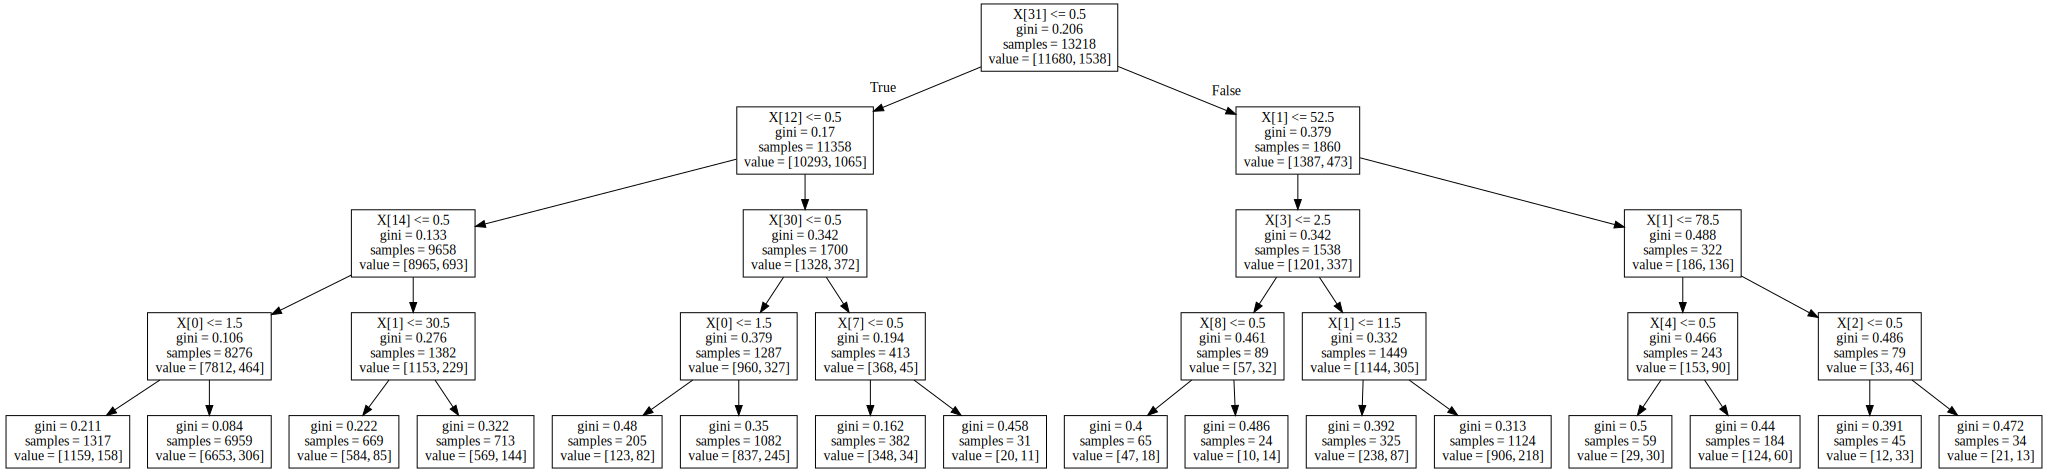

In [53]:
# use graphviz and lime to visualise the model and show paths through the tree for new data?
tree = export_graphviz(dtc, out_file=None)
graphviz.Source(tree)

## Part 5 - evaluating the model

In [44]:
# binary classification metrics

# want good examples to demonstrate pros/cons of different metrics

In [45]:
# testing on test data

In [46]:
predictions = dtc.predict(X_test)
true_labels = y_test

In [47]:
metrics.precision_score(true_labels, predictions)

0.43859649122807015

In [48]:
metrics.accuracy_score(true_labels, predictions)

0.8833186231244484

In [49]:
metrics.confusion_matrix(true_labels, predictions)

array([[4979,   32],
       [ 629,   25]], dtype=int64)